
Normalmente, los individuos buscan escuchar música según los gustos que han desarrollado a lo largo de sus vidas, basados en experiencias, recuerdos y sensaciones que le provocan; Lo que la gran mayoría ignoramos, es el hecho de que la música es mucho más que el sonido que sale de nuestros parlantes(sin referirnos al arte que representa).

Cuando uno comienza a explorar los datos relacionados al genero o tipo de musica que se analiza, se pueden ir clasificando hasta rasgos PERSONALES de cada persona según gustos musicales, entonces entendiendo que un track puede ser un conjunto de notas y sonidos que pueden llegar a la personalidad de muchas personas en la sociedad, la gran pregunta es... **¿Cuáles son los datos escondidos dentro de la música?**

Afortunadamente, no fuimos los primeros en pensar esta forma de ver la música y, en nuestra empresa ,*Spotify*,llevan años y años de datos recolectados, clasificados por track y artista.
Hoy los tenemos a nuestra disposición para poder realizar cualquier tipo de análisis y plantear teorias por mas descabelladas que sean, remitiendonos a los datos.


##Analisis de las características mas desapercibidas de canciones disponibles en spotify.

**Contexto empresarial**: En nuestra empresa se requiere un analisis de ciertas características que fueron siendo guardadas con cada subida de canción.
_____________________________
**Contexto comercial**: Éste analisis nos es requerido para poder "predecir" mediante caracteristicas , la popularidad que puede llegar a generar "x" cancion.
______________________________
**Problema empresarial**: La empresa está en busca de nuevos modelos predictivos para sumar más herramientas al momento de poder analizar el producto expuesto.
_______________________________
**Problema comercial**: Se necesita mejorar la inteligencia artifical que ofrece al cliente recomendaciones basandose en sus gustos musicales.
_________________________________
**Contexto analítico**: Nuestra base de datos contiene datos de canciones desde el 1921 al 2020, tenemos mas de 600mil canciones.
_________________________________
**Alcance y nivel de aplicación del proyecto**:El resultado del analisis a realizar y el modelo de datos conseguido  , van a ser utilizados para mejorar la experiencia del cliente.

---
EDA:
Las preguntas que buscamos responder explorando nuestro set de datos para poder cumplir con el pedido son:

¿Tenemos datos nulos?

¿Hay outliers que dificulten el analisis?

¿Hay relacion positiva entre popularity y danceability?

¿Hay relación positiva entre popularity y instrumentalness?

¿Hay relación positiva entre popularity y acousticness?

¿Hay relación positiva entre popularity y energy?

¿Hay relación positiva entre popularity y speechiness?

¿Hay relación positiva entre popularity y liveness?

¿La duración de la canción y la fecha de salida tienen relacion positiva con popularity?


#Exploración de datos


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib
from sklearn.linear_model import LinearRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
sns.set(rc={'figure.figsize':(15,6)})
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
!pip install spotipy
import requests
import json
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from pandas import json_normalize



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 246 kB 40.2 MB/s 
     |████████████████████████████████| 62 kB 1.4 MB/s 
     |████████████████████████████████| 140 kB 54.2 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [3]:
from google.colab import drive
drive.mount('/content/drive')

#Establecemos una ruta de acceso al google drive.
%cd "/content/drive/MyDrive/Data Science/Datasets+DiNardo-Contreras"

#!unzip archive.zip

data= pd.read_csv ('/content/drive/MyDrive/Data Science/Datasets+DiNardo-Contreras/tracks.csv')
# data=data[:5000]


data.fillna(0)
data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Data Science/Datasets+DiNardo-Contreras


,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,0,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,0,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,0,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,0,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4


#Variables disponibles:
* **id**: Identificador asignado a cada cancion.
* **name**: Nombre de la cancion.
* **popularity**: Popularidad.
* **duration**: Duracion en milisegundos.
* **explicit**: Si posee contenido explicito o no.
* **artists**: Artista o artistas autores de la cancion.
* **id_artists**: Identificador del artista o artistas autores de la cancion.
* **release_date**: Fecha de salida de la cancion.
* **danceability**: Que tan bailable es la cancion del 0 al 1.
* **energy**: Nivel de enegia en la cancion del 0 al 1.
* **key**: Nota musical base de la cancion.
* **loudness**: Que tan ruidosa es la cancion medida en decibeles.
* **mode**: Modalidad de la cancion. 0 si es menor, 1 si es mayor.
* **speechiness**: Presencia de palabras habladas en la cancion, en un rango de 0 a 1.
* **acoustic**: Que tan acustica es la cancion del 0 al 1.
* **instrumentalness**: Ausencia de sonidos vocales del 0 al 1.
* **liveness**: Presencia de audiencia del 0 al 1.
* **valence**: Positividad de la cancion del 0 al 1.
* **tempo**: Tempo de la cancion medido en BPM.
* **time_signature**

#Data wrangling


In [3]:
#Verificamos que en la base de datos no existan datos duplicados.
data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
586667    False
586668    False
586669    False
586670    False
586671    False
Length: 586672, dtype: bool

In [4]:
#Verificamos que no tengamos datos nulos
data.isnull()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
586668,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
586669,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
586670,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
#Visualizamos el tipo de dato de cada serie de nuestro dataframe.
data.dtypes


id                   object
name                 object
popularity            int64
duration_ms           int64
explicit              int64
artists              object
id_artists           object
release_date         object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
dtype: object

In [ ]:
#Eliminamos columna timesignature , ya que no le encontramos utilidad
data.drop(["time_signature"],axis=1,inplace=True)

In [ ]:
#Cambiamos el tipo de dato de la columna fecha
data["release_date"]=pd.to_datetime(data["release_date"])

In [ ]:
#Manipulamos la columna duration_ms , para que exprese la duración de las canciones en segundos.
data["duration_ms"]=data["duration_ms"]/1000
#Cambiamos el nombre de la columna a "duration_s" , ya que ahora esta expresada en segundos
data.rename(columns={"duration_ms":"duration_s"},inplace=True)
data["duration_s"]


In [5]:
#Cambiamos los datos que son 0 y 1 como entero a true - false
data["explicit"]=data["explicit"].astype("bool")
data["mode"]=data["mode"].astype("bool")
data

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,False,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,True,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,False,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,True,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,False,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,True,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,False,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,True,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,False,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,False,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,云与海,50,258267,False,['阿YueYue'],['1QLBXKM5GCpyQQSVMNZqrZ'],2020-09-26,0.560,0.5180,0,-7.471,False,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
586668,0NuWgxEp51CutD2pJoF4OM,blind,72,153293,False,['ROLE MODEL'],['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,0,-5.223,True,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
586669,27Y1N4Q4U3EfDU5Ubw8ws2,What They'll Say About Us,70,187601,False,['FINNEAS'],['37M5pPGs6V1fchFJSgCguX'],2020-09-02,0.535,0.3140,7,-12.823,False,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
586670,45XJsGpFTyzbzeWK8VzR8S,A Day At A Time,58,142003,False,"['Gentle Bones', 'Clara Benin']","['4jGPdu95icCKVF31CcFKbS', '5ebPSE9YI5aLeZ1Z2g...",2021-03-05,0.696,0.6150,10,-6.212,True,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4


#Datos extras extraidos desde API de spotify 


In [ ]:
#Con nuestro usuario y clave secreta nos verificamos y luego con un ciclo for requerimos a la api todos los tracks con los id dentro del ciclo
cid = '4bcb7e188e924658a17ac30a05a85366'
secret = '48d68c610e424694834e370e03eb72a5'
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager
=
client_credentials_manager)


array=[]

for id in data["id"]:
  analysis=sp.audio_analysis(id)
  array.append(analysis["track"])

In [ ]:
#Resultados de la extración
df=pd.DataFrame(array)
df

In [4]:
#Averiguamos valores minimos y maximos de series de interes.
minimos=pd.Series(data=[data['acousticness'].min(),data['speechiness'].min(),data['danceability'].min(),data['energy'].min(),data['loudness'].min(),data['instrumentalness'].min()],index=["acousticness","speechiness","danceability","energy","loudness","instrumentalness"])
maximos=pd.Series(data=[data['acousticness'].max(),data['speechiness'].max(),data['danceability'].max(),data['energy'].max(),data['loudness'].max(),data['instrumentalness'].max()],index=["acousticness","speechiness","danceability","energy","loudness","instrumentalness"])
#------------------------------------#
info=pd.DataFrame(data=[minimos,maximos],index=["Minimos","Maximos"])
info

,acousticness,speechiness,danceability,energy,loudness,instrumentalness
Minimos,0.000,0.000,0.000,0.0,-60.000,0.0
Maximos,0.996,0.971,0.991,1.0,5.376,1.0


#     Graficos descriptivos / insights 
Utilizamos graficos bivariados para apuntar a los insights mas significantes.

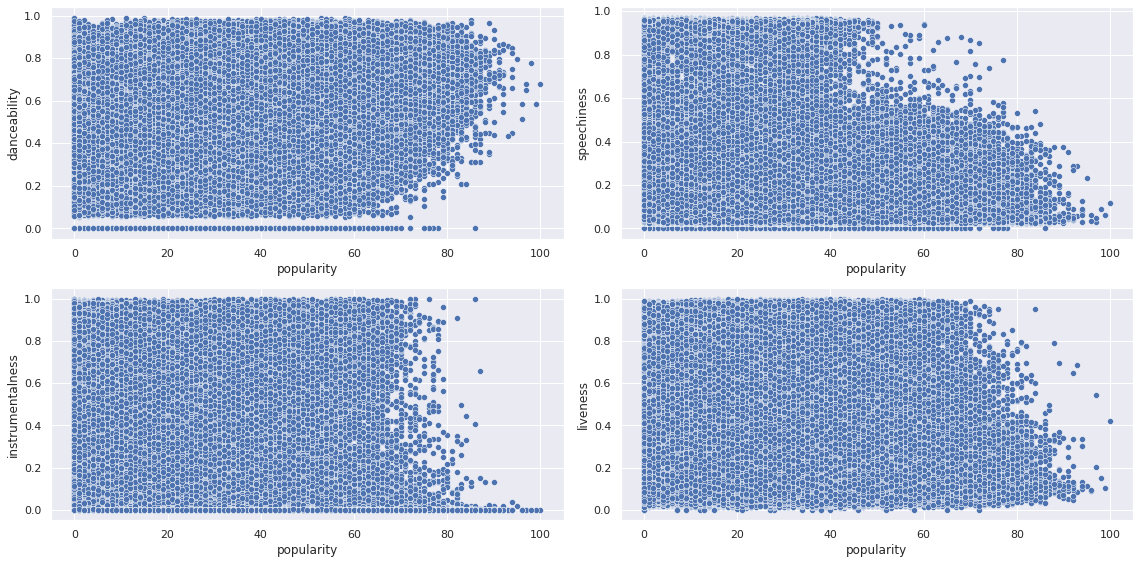

In [6]:
#Graficos bivariados que demuestran la relación entre cada una de las características.
f,axs=plt.subplots(2,2,figsize=(16, 8))

sns.scatterplot(data=data,x="popularity",y="danceability",ax=axs[0][0])
sns.scatterplot(data=data,x="popularity",y="speechiness",ax=axs[0][1])
sns.scatterplot(data=data,x="popularity",y="instrumentalness",ax=axs[1][0])
sns.scatterplot(data=data,x="popularity",y="liveness",ax=axs[1][1])
f.tight_layout()

In [7]:
#Se puede observar que a medida que en las canciones que hay menos instrumental , suelen tener mayor popularidad.
#Hay una divergencia que nos dice que las canciones en vivo a medida que va aumentando la popularidad se prefieren canciones que no estan en vivo.
#No hay una relación tan marcada entre popularidad y bailabilidad , en la mitad del rango se comienza a ver que realmente son mas populares las que son entre 60 y 80% mas bailables.
#La relación de habladuría de una canción y popularidad nos dice que a medida que menos se habla/canta , aumenta la popularidad.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead


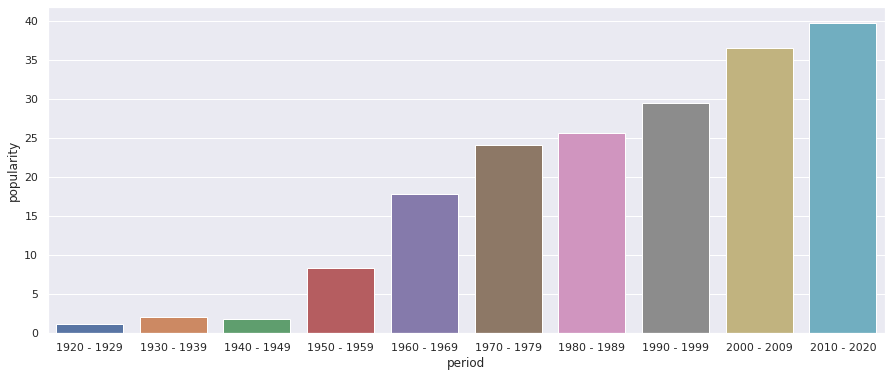

In [8]:
#Gráfico de barras por décadas , medidos en popularidad.
_data=data[["release_date","popularity"]]
_data["release_date"]=pd.DatetimeIndex(_data["release_date"]).year

period_length = 10
start_year = 1920
end_year = 2020

year_range = end_year - start_year
modulo = year_range % period_length

if modulo == 0:
    final_start = end_year - period_length
else:
    final_start = end_year - modulo
final_end = end_year + 1

starts = np.arange(start_year, final_start, period_length).tolist()

tuples = [(start, start+period_length) for start in starts]

tuples.append(tuple([final_start, final_end]))
bins = pd.IntervalIndex.from_tuples(tuples, closed='left')

original_labels = list(bins.astype(str))
new_labels = ['{} - {}'.format(b.strip('[)').split(', ')[0], int(b.strip('[)').split(', ')[1])-1) for b in original_labels]
label_dict = dict(zip(original_labels, new_labels))


_data["period"]=pd.cut(_data["release_date"], bins=bins, include_lowest=True, precision=0)
_data["period"]=_data["period"].astype("str")
_data=_data.replace(label_dict)

_data=_data.groupby('period').mean().reset_index().drop('release_date', axis=1)

_data=_data[(_data["period"]!="nan")]

sns.barplot(data=_data,x="period",y="popularity")

In [9]:
#El gráfico habla por si solo ... nos dice que a medida que pasan las décadas disminuye la popularidad del anterior.

[Text(0, 0.5, 'Duration'),
 Text(0.5, 0, 'Popularity'),
 Text(0.5, 1.0, 'Relacion entre duración y popularidad')]

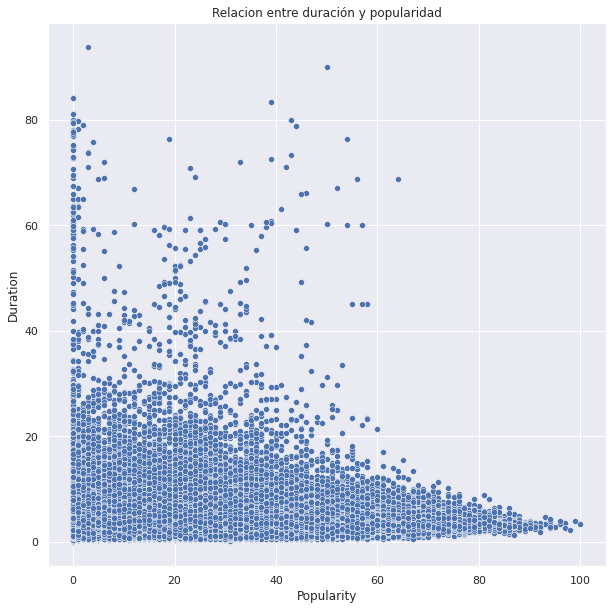

In [10]:
#Relación entre duración y popularidad , duración medida en minutos.
sns.set(rc={"figure.figsize":(10,10)})
relacion_duracion_popularidad=sns.scatterplot(x=data["popularity"],y=data["duration_ms"]/1000/60)
relacion_duracion_popularidad.set(xlabel="Popularity",ylabel="Duration",title="Relacion entre duración y popularidad")


In [11]:
#En el rango de 0-5 minutos , la popularidad se encuentra llegando a sus niveles maximos.A medida que aumenta el tiempo de la canción fuera de ese rango , disminuye la popularidad.

In [12]:
modelo1 = 'popularity~instrumentalness'

regresion1= smf.ols(formula=modelo1 , data=data).fit()
print(regresion1.summary())

                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                 3.475e+04
Date:                Thu, 27 Oct 2022   Prob (F-statistic):               0.00
Time:                        02:29:06   Log-Likelihood:            -2.5232e+06
No. Observations:              586672   AIC:                         5.046e+06
Df Residuals:                  586670   BIC:                         5.046e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           29.4170      0.025  

#Feature selection

In [13]:
# data["release_date"]=pd.to_datetime(data["release_date"])
x=data.drop(["popularity","id","name","artists","id_artists","release_date"],1)
y=data["popularity"]



from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=11,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

sfs.fit(x, y)
sfs.k_feature_names_     #Lista final de features

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


('duration_ms',
 'explicit',
 'danceability',
 'energy',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo')

#Algoritmo de clasificación

In [ ]:
# Separamos en entrenamiento/test en razon 80/20 %
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=1)
# Creamos un modelo Random Forest con parametros por defect
modelo = RandomForestClassifier(random_state=1)
modelo.fit(x_train, y_train)
# Obtenemos las predicciones del modelo con X_test
preds = modelo.predict(x_test) 
plt.figure(figsize=(10,6))
metrics.plot_confusion_matrix(modelo, x_test, y_test, display_labels=['Unpopular' , 'Popular'])

#Conclusión(temporal)

Mediante los gráficos pudimos responder TODAS las preguntas de interes propuestas en la seccion EDA.Seleccionamos los features mas relevantes y creamos un algoritmo de clasificación.